# Data Preprocessing Notebook

In [490]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [516]:
# Load penguins dataset
penguins = sns.load_dataset('penguins')

In [521]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [518]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [523]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [520]:
# Fill in missing values
penguins['bill_depth_mm'] = penguins['bill_depth_mm'].fillna(penguins['bill_depth_mm'].mean())
penguins['bill_length_mm'] = penguins['bill_length_mm'].fillna(penguins['bill_length_mm'].mean())
penguins['flipper_length_mm'] = penguins['flipper_length_mm'].fillna(penguins['flipper_length_mm'].mean())
penguins['body_mass_g'] = penguins['body_mass_g'].fillna(penguins['body_mass_g'].mean())
penguins['sex'] = penguins['sex'].fillna(penguins['sex'].mode()[0])

In [522]:
penguins.duplicated().sum() # Check for duplicates

0

# Feature Scaling

In [544]:
# Standardization (Z-score normalization)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])

In [545]:
# Min-max scaling (Normalization)
min_max_scaler = MinMaxScaler()
min_max_scaled_features = min_max_scaler.fit_transform(penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])

In [546]:
# Robust scaling
robust_scaler = RobustScaler()
robust_scaled_features = robust_scaler.fit_transform(penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])

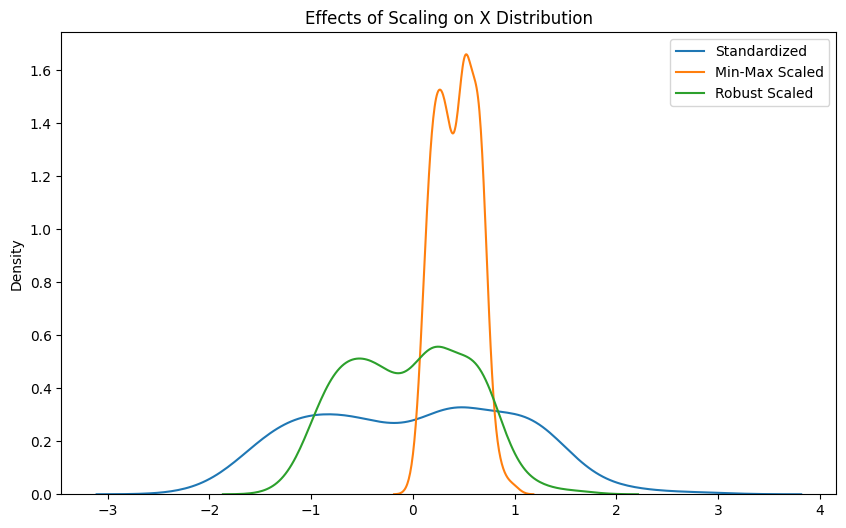

In [551]:
# Visualize scaling effects on feature distributions
fig, ax = plt.subplots(figsize=(10, 6))
# sns.kdeplot(penguins['bill_length_mm'], label='Original', ax=ax)
sns.kdeplot(scaled_features[:,0], label='Standardized', ax=ax)
sns.kdeplot(min_max_scaled_features[:,0], label='Min-Max Scaled', ax=ax)
sns.kdeplot(robust_scaled_features[:,0], label='Robust Scaled', ax=ax)
plt.title('Effects of Scaling on X Distribution')
plt.legend()
plt.show()

# Encoding Categorical Variables

In [562]:
# One-hot encoding (Dummy encoding)
onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit_transform(penguins[['species']])
onehot_encoded = onehot_encoded.toarray()
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out())
onehot_df.value_counts()

species_Adelie  species_Chinstrap  species_Gentoo
1.0             0.0                0.0               152
0.0             0.0                1.0               124
                1.0                0.0                68
Name: count, dtype: int64

In [561]:
penguins['species'].tail(10)

334    Gentoo
335    Gentoo
336    Gentoo
337    Gentoo
338    Gentoo
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, dtype: object

In [560]:
onehot_df.tail(10)

,species_Adelie,species_Chinstrap,species_Gentoo
334,0.0,0.0,1.0
335,0.0,0.0,1.0
336,0.0,0.0,1.0
337,0.0,0.0,1.0
338,0.0,0.0,1.0
339,0.0,0.0,1.0
340,0.0,0.0,1.0
341,0.0,0.0,1.0
342,0.0,0.0,1.0
343,0.0,0.0,1.0


In [563]:
# Ordinal encoding (Label encoding)
ordinal_categories = ['Adelie', 'Chinstrap', 'Gentoo']
ordinal_encoder = OrdinalEncoder(categories=[ordinal_categories])
ordinal_encoded = ordinal_encoder.fit_transform(penguins[['species']])

In [503]:
penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [504]:
pd.DataFrame(ordinal_encoded, columns=['species_ordinal']).value_counts()

species_ordinal
0.0                152
2.0                124
1.0                 68
Name: count, dtype: int64

In [564]:
pd.DataFrame(ordinal_encoded, columns=['species_ordinal']).head(10)

,species_ordinal
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


# Feature Engineering 

In [565]:
# Interaction features
penguins['bill_volume'] = penguins['bill_length_mm'] * penguins['bill_depth_mm']

In [566]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'bill_volume'],
      dtype='object')

In [567]:
# Encode species
species_encoder = OneHotEncoder()
species_encoded = species_encoder.fit_transform(penguins[['species']])
species_encoded = species_encoded.toarray()
species_df = pd.DataFrame(species_encoded, columns=species_encoder.get_feature_names_out())
species_df.head()

# Add species column with encoded species
penguins = pd.concat([penguins, species_df], axis=1)

In [568]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_volume,species_Adelie,species_Chinstrap,species_Gentoo
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male,731.170000,1.0,0.0,0.0
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female,687.300000,1.0,0.0,0.0
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female,725.400000,1.0,0.0,0.0
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male,753.312467,1.0,0.0,0.0
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female,708.310000,1.0,0.0,0.0


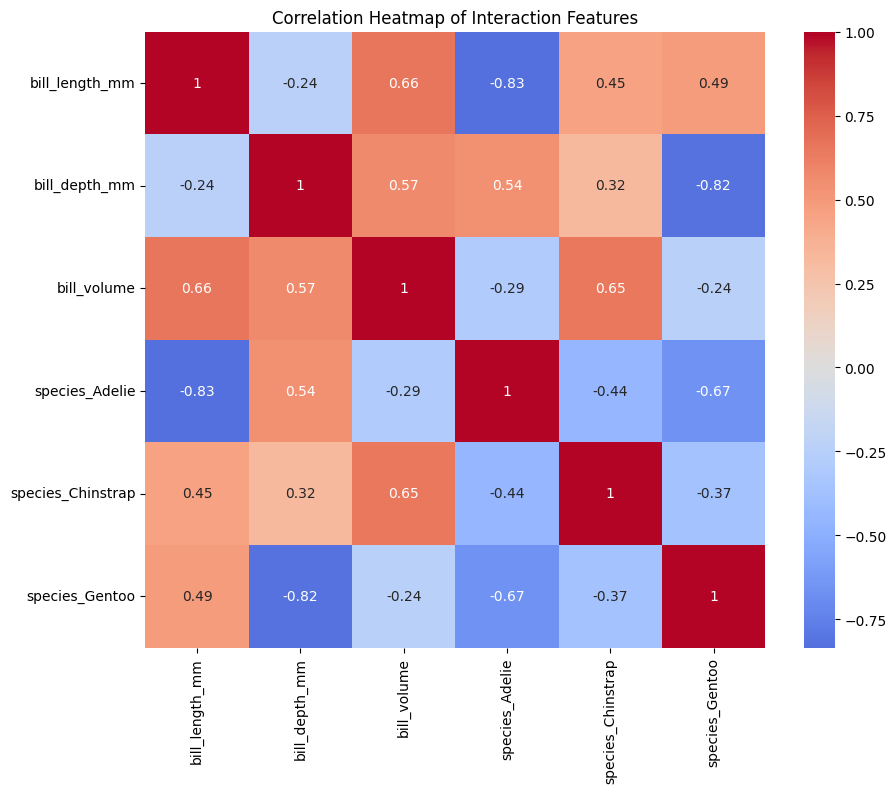

In [569]:
# Visualize interaction features
interaction_features = penguins[['bill_length_mm', 'bill_depth_mm', 'bill_volume', 'species_Adelie', 'species_Chinstrap', 'species_Gentoo']]
plt.figure(figsize=(10, 8))
sns.heatmap(interaction_features.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Interaction Features')
plt.show()

In [570]:
# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out())

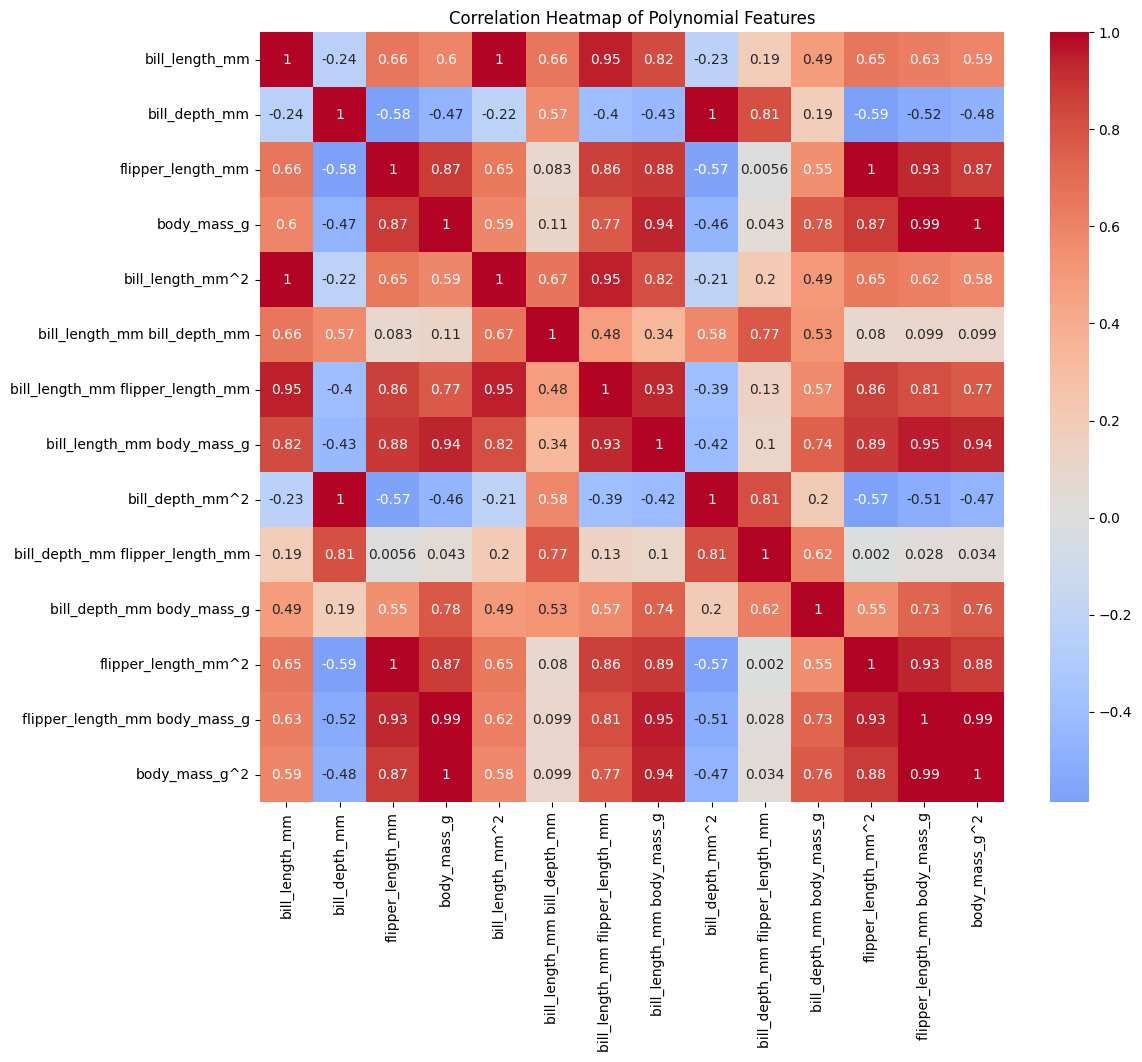

In [571]:
# Visualize polynomial features
plt.figure(figsize=(12, 10))
sns.heatmap(poly_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Polynomial Features')
plt.show()

# Imbalanced Data Handling

In [575]:
# Original class distribution
original_distribution = penguins['species'].value_counts()
original_distribution

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [576]:
X = penguins.drop('species', axis=1)
y = penguins['species']

In [577]:
# Random oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
oversample_distribution = pd.Series(y_over).value_counts()

In [578]:
# Random undersampling
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X, y)
undersample_distribution = pd.Series(y_under).value_counts()

In [579]:
# Encode sex
ordinal_encoder = OrdinalEncoder()
penguins['sex'] = ordinal_encoder.fit_transform(penguins[['sex']])

# Encode island
penguins['island'] = ordinal_encoder.fit_transform(penguins[['island']])

In [580]:
X = penguins.drop('species', axis=1)
y = penguins['species']

In [581]:
# SMOTE
smote = SMOTE(sampling_strategy='auto')
X_smote, y_smote = smote.fit_resample(X, y)
smote_distribution = pd.Series(y_smote).value_counts()

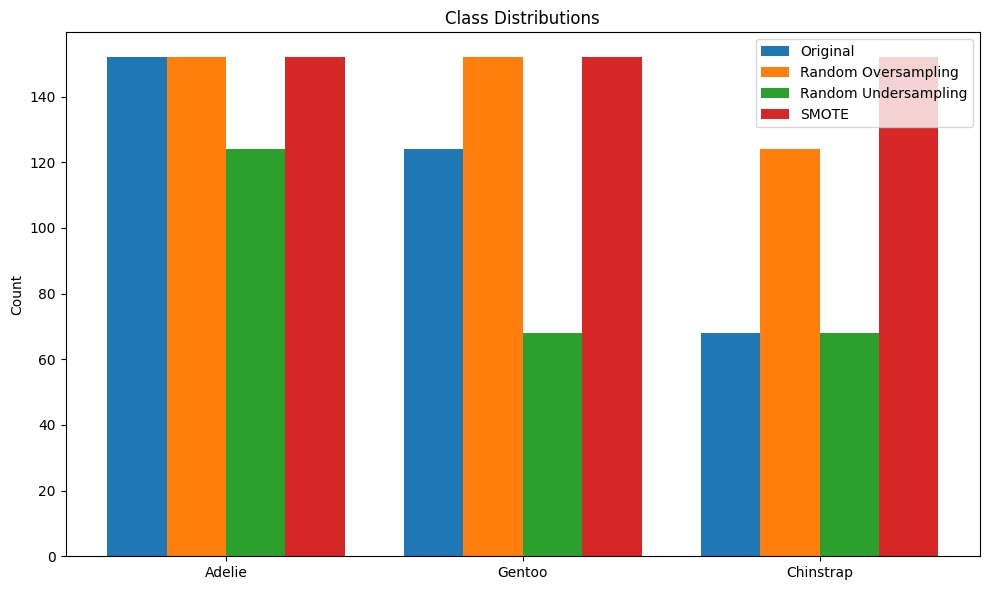

In [582]:
# Plot the class distributions
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2
x = np.arange(len(original_distribution))

ax.bar(x - width*1.5, original_distribution, width, label='Original')
ax.bar(x - width/2, oversample_distribution, width, label='Random Oversampling')
ax.bar(x + width/2, undersample_distribution, width, label='Random Undersampling')
ax.bar(x + width*1.5, smote_distribution, width, label='SMOTE')

ax.set_xticks(x)
ax.set_xticklabels(original_distribution.index)
ax.set_ylabel('Count')
ax.set_title('Class Distributions')
ax.legend()

plt.tight_layout()
plt.show()